In [1]:
import os
import pandas
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob


/Users/jacobv/ffml/lib/python3.7/site-packages/pandas/compat/__init__.py:97: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [ ]:
# fixes issue with autocomplete and pandas
%config Completer.use_jedi = False

# Objectives
* GM: Amount of points people got off draft / waiver wire / trades
* Coach: started points vs optimal points


# Example df

In [2]:
df = pandas.read_csv('CanadianBallsRBigger-League-History/2020/1.csv')
df

,Owner,Rank,QB,Points,RB,Points.1,RB.1,Points.2,WR,Points.3,...,Points.14,BN.5,Points.15,RES,Points.16,RES.1,Points.17,Total,Opponent,Opponent Total
0,Jake,9,D. Watson QB - HOU,20.82,K. Hunt RB - CLE,12.1,A. Jones RB - GB,17.6,T. Lockett WR - SEA,17.2,...,0.0,J. Burrow QB - CIN,16.32,-,-,-,-,117.62,Lucas,161.10
1,Lucas,3,L. Jackson QB - BAL,27.50,C. McCaffrey RB - CAR,28.5,D. Singletary RB - BUF,10.3,A. Cooper WR - DAL,18.1,...,14.2,J. Reagor WR - PHI,7.10,-,-,-,-,161.10,Jake,117.62
2,Graham,2,A. Rodgers QB - GB,30.76,E. Elliott RB - DAL,27.7,J. Conner RB - PIT,3.7,A. Thielen WR - MIN,31.0,...,11.7,C. Akers RB - LA,5.30,R. Armstead RB - JAX,0.0,-,-,167.06,f,105.94
3,Liam,4,J. Allen QB - BUF,28.18,T. Gurley RB - ATL,13.7,A. Ekeler RB - LAC,9.7,D. Adams WR - GB,41.6,...,0.0,D. Swift RB - DET,11.30,-,-,-,-,144.38,Sam,128.20
4,Matt,6,M. Ryan QB - ATL,23.90,D. Johnson RB - HOU,19.9,C. Edwards-Helaire RB - KC,19.8,K. Allen WR - LAC,7.7,...,13.6,A. Miller WR - CHI,17.60,-,-,-,-,131.90,Jess,136.60
5,Kevin,8,P. Mahomes QB - KC,20.44,A. Kamara RB - NO,23.7,R. Jones RB - TB,10.2,A. Green WR - CIN,10.1,...,14.9,J. Jefferson WR - MIN,4.60,-,-,-,-,123.14,Nolan,180.08
6,Nolan,1,R. Wilson QB - SEA,31.78,C. Carson RB - SEA,24.6,J. Jacobs RB - LV,35.9,W. Fuller WR - HOU,19.2,...,28.2,B. Edwards WR - LV,1.90,-,-,-,-,180.08,Kevin,123.14
7,Jess,5,C. Wentz QB - PHI,13.00,M. Ingram RB - BAL View News,2.9,D. Henry RB - TEN,16.1,J. Jones WR - ATL,24.7,...,8.4,T. Pollard RB - DAL,10.00,-,-,-,-,136.60,Matt,131.90
8,Sam,7,K. Murray QB - ARI,26.30,J. Mixon RB - CIN,6.1,D. Cook RB - MIN,21.8,R. Woods WR - LA,17.9,...,10.0,B. Aiyuk WR - SF,0.00,D. Harris RB - NE,0.0,D. Samuel WR - SF,0.0,128.20,Liam,144.38
9,f,10,D. Prescott QB - DAL View News,17.64,L. Bell RB - KC,6.6,S. Barkley RB - NYG,12.6,A. Robinson WR - CHI,12.3,...,6.9,H. Ruggs WR - LV,9.60,-,-,-,-,105.94,Graham,167.06


# First thing: Make a player df
* Player
* Position
* Drafted by
* Each weeks points
* Each weeks ownership
* Each weeks transaction status [fa, trade, pick-up, none]
* Play status [fa, active, bench]

#### Get all players

In [3]:
wdfs = sorted(glob('CanadianBallsRBigger-League-History/2020/*.csv'))
wdfs

['CanadianBallsRBigger-League-History/2020/1.csv',
 'CanadianBallsRBigger-League-History/2020/10.csv',
 'CanadianBallsRBigger-League-History/2020/11.csv',
 'CanadianBallsRBigger-League-History/2020/12.csv',
 'CanadianBallsRBigger-League-History/2020/13.csv',
 'CanadianBallsRBigger-League-History/2020/14.csv',
 'CanadianBallsRBigger-League-History/2020/15.csv',
 'CanadianBallsRBigger-League-History/2020/16.csv',
 'CanadianBallsRBigger-League-History/2020/2.csv',
 'CanadianBallsRBigger-League-History/2020/3.csv',
 'CanadianBallsRBigger-League-History/2020/4.csv',
 'CanadianBallsRBigger-League-History/2020/5.csv',
 'CanadianBallsRBigger-League-History/2020/6.csv',
 'CanadianBallsRBigger-League-History/2020/7.csv',
 'CanadianBallsRBigger-League-History/2020/8.csv',
 'CanadianBallsRBigger-League-History/2020/9.csv']

In [4]:
pos = ['QB','RB','WR','TE','R/W/T','K','DEF','BN','RES']

In [5]:
for i,row in df.iterrows():
    print(row['Owner'])

Jake
Lucas
Graham
Liam
Matt
Kevin
Nolan
Jess
Sam
f


In [6]:
row['DEF']

'Steelers DEF '

In [7]:
row['QB'].split()

['D.', 'Prescott', 'QB', '-', 'DAL', 'View', 'News']

In [8]:
# defense are a problem
# rservers or empty benches

In [85]:
player = pandas.DataFrame() # collect the results long form
tplayer = pandas.DataFrame() # collect the results tall form
count = 0

# iterate through week dataframes
for wdf in wdfs:
    # get the week number
    pth,flnm = os.path.split(wdf)
    week = '%0.2d'%int(flnm.split('.')[0])
    # read data
    data = pandas.read_csv(wdf)
    for i,row in data.iterrows():
        # get basic player information
        owner = row['Owner']
        for col in row.index:
            # only columns that have players in them
            if any([x in col for x in pos]):
                # ignore if slot is empty
                if row[col] == '-': 
                    continue
                # defense are weird so deal w/ non defense first
                if 'DEF' not in row[col]:
                    # get player info
                    info = row[col].split()
                    p_name = '%s, %s'%(info[1],info[0])
                    ppos = info[2]
                    if len(info) == 3: # i.e. if not on team
                        pteam = 'Free Agent'
                    else:
                        pteam = info[4]
                    # this will be the index because guaranteed to be unique
                    pstr = '%s %s %s'%(p_name,ppos,pteam)
                # now deal w defenses
                elif 'DEF' in row[col]: 
                    p_name = row[col]
                    ppos = row[col].split()[-1]
                    # deal with WFT
                    pteam = ''
                    for x in row[col].split()[:-1]:
                        pteam = pteam.join(x)
                    # this will be the index because guaranteed to be unique
                    pstr = row[col]
                    
                # get points for that week
                nextcol = row.index.tolist().index(col)+1
                points = row[nextcol]
                
                # get status for that week
                if 'BN' in col:
                    status = 'Inactive'
                    rstatus = 'Bench'
                elif 'RES' in col:
                    status = 'Inactive'
                    rstatus = 'Reserve'
                else:
                    status = 'Active'
                    rstatus = 'Starting'
                
                ## Long form storing data
                # if not already in spreadsheet
                if pstr not in player.index.values:
                    # save basic info
                    player.loc[pstr,'name'] = p_name
                    player.loc[pstr,'position'] = ppos
                    player.loc[pstr,'team'] = pteam
                    player.loc[pstr,'first_owner'] = owner
                
                # save weekly data (will make new column for each week)
                player.loc[pstr,'Week%s_owner'%week] = owner
                player.loc[pstr,'Week%s_points'%week] = points
                player.loc[pstr,'Week%s_status'%week] = status
                player.loc[pstr,'Week%s_RostStatus'%week] = rstatus
                
                ## Tall form storing data
                tplayer.loc[count,'name'] = p_name
                tplayer.loc[count,'position'] = ppos
                tplayer.loc[count,'team'] = pteam
                tplayer.loc[count,'unique_str'] = pstr
                tplayer.loc[count,'week'] = week
                tplayer.loc[count,'owner'] = owner
                tplayer.loc[count,'points'] = points
                tplayer.loc[count,'status'] = status
                tplayer.loc[count,'RostStatus'] = rstatus
                count += 1

In [23]:
player

,name,position,team,first_owner,Week01_owner,Week01_points,Week01_status,Week01_RostStatus,Week10_owner,Week10_points,...,Week07_status,Week07_RostStatus,Week08_owner,Week08_points,Week08_status,Week08_RostStatus,Week09_owner,Week09_points,Week09_status,Week09_RostStatus
"Watson, D. QB HOU","Watson, D.",QB,HOU,Jake,Jake,20.82,Active,Starting,Jake,14.12,...,Active,Starting,Jake,0.0000,Inactive,Bench,Jake,24.2400,Active,Starting
"Hunt, K. RB CLE","Hunt, K.",RB,CLE,Jake,Jake,12.10,Active,Starting,Jake,16.20,...,Active,Starting,Jake,9.3000,Active,Starting,Jake,0.0000,Inactive,Bench
"Jones, A. RB GB","Jones, A.",RB,GB,Jake,Jake,17.60,Active,Starting,Jake,14.50,...,Inactive,Bench,Jake,0.0000,Inactive,Bench,Jake,12.9000,Active,Starting
"Lockett, T. WR SEA","Lockett, T.",WR,SEA,Jake,Jake,17.20,Active,Starting,Jake,11.60,...,Active,Starting,Jake,7.3000,Active,Starting,Jake,8.0000,Active,Starting
"Thomas, M. WR NO","Thomas, M.",WR,NO,Jake,Jake,4.70,Active,Starting,Jake,4.70,...,Inactive,Bench,Jake,0.0000,Inactive,Bench,Jake,10.1000,Active,Starting
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Patrick, T. WR DEN","Patrick, T.",WR,DEN,Sam,NaN,NaN,NaN,NaN,NaN,NaN,...,Inactive,Bench,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"McManus, B. K DEN","McManus, B.",K,DEN,f,NaN,NaN,NaN,NaN,NaN,NaN,...,Active,Starting,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Penny, R. RB SEA","Penny, R.",RB,SEA,Sam,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Sam,0.0,Inactive,Reserve,Sam,0.0,Inactive,Reserve
"Dallas, D. RB SEA","Dallas, D.",RB,SEA,Nolan,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Nolan,11.9000,Active,Starting


In [42]:
tplayer

,name,position,team,unique_str,week,owner,points,status,RostStatus
0,"Watson, D.",QB,HOU,"Watson, D. QB HOU",01,Jake,20.8200,Active,Starting
1,"Hunt, K.",RB,CLE,"Hunt, K. RB CLE",01,Jake,12.1000,Active,Starting
2,"Jones, A.",RB,GB,"Jones, A. RB GB",01,Jake,17.6000,Active,Starting
3,"Lockett, T.",WR,SEA,"Lockett, T. WR SEA",01,Jake,17.2000,Active,Starting
4,"Thomas, M.",WR,NO,"Thomas, M. WR NO",01,Jake,4.7000,Active,Starting
...,...,...,...,...,...,...,...,...,...
2692,"Boyd, T.",WR,CIN,"Boyd, T. WR CIN",09,f,0.0000,Inactive,Bench
2693,"Scott, B.",RB,PHI,"Scott, B. RB PHI",09,f,0.0000,Inactive,Bench
2694,"Fant, N.",TE,DEN,"Fant, N. TE DEN",09,f,7.5000,Inactive,Bench
2695,"Barkley, S.",RB,NYG,"Barkley, S. RB NYG",09,f,0.0000,Inactive,Bench


#### Why did I do tall form as well? Ease of plotting

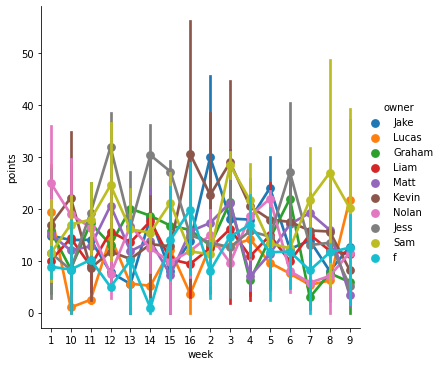

In [73]:
sns.catplot(x='week',y='points',hue='owner',kind='point',
           data=tplayer[(tplayer.position=='RB') &\
                        (tplayer.status=='Active')]
           )

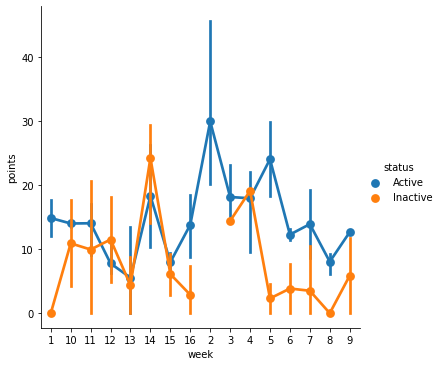

In [81]:
sns.catplot(x='week',y='points',hue='status',kind='point',
           data=tplayer[(tplayer.position=='RB') &\
                        (tplayer.owner=='Jake')]
           )

#### Okay back to the task
* Add weekly transaction status
* Fill in empty data


Starting with wide format

In [11]:
## Fill holes
for i,row in player.iterrows():
    for col in player.columns:
        if '_status' in col and not pandas.notnull(row[col]):
            player.loc[i,col] = 'FA'
        elif '_RostStatus' in col and not pandas.notnull(row[col]):
            player.loc[i,col] = 'FA'
        elif '_owner' in col and not pandas.notnull(row[col]):
            player.loc[i,col] = 'FA'

In [12]:
player.tail()

,name,position,team,first_owner,Week1_owner,Week1_points,Week1_status,Week1_RostStatus,Week10_owner,Week10_points,...,Week7_status,Week7_RostStatus,Week8_owner,Week8_points,Week8_status,Week8_RostStatus,Week9_owner,Week9_points,Week9_status,Week9_RostStatus
"Patrick, T. WR DEN","Patrick, T.",WR,DEN,Sam,FA,NaN,FA,FA,FA,NaN,...,Inactive,Bench,FA,NaN,FA,FA,FA,NaN,FA,FA
"McManus, B. K DEN","McManus, B.",K,DEN,f,FA,NaN,FA,FA,FA,NaN,...,Active,Starting,FA,NaN,FA,FA,FA,NaN,FA,FA
"Penny, R. RB SEA","Penny, R.",RB,SEA,Sam,FA,NaN,FA,FA,FA,NaN,...,FA,FA,Sam,0.0,Inactive,Reserve,Sam,0.0,Inactive,Reserve
"Dallas, D. RB SEA","Dallas, D.",RB,SEA,Nolan,FA,NaN,FA,FA,FA,NaN,...,FA,FA,FA,NaN,FA,FA,Nolan,11.9000,Active,Starting
"Hasty, J. RB SF","Hasty, J.",RB,SF,Sam,FA,NaN,FA,FA,FA,NaN,...,FA,FA,FA,NaN,FA,FA,Sam,5.4000,Active,Starting


In [17]:
## get transaction status
owner_cols = [x for x in player.columns if '_owner' in x][1:]
for i,row in player.iterrows():
    for c in range(len(owner_cols)):
        if c == 0:
            if row['Week1_owner'] == 'FA':
                player.loc[i,'Week1_TransStatus'] = 'FA'
            else:
                player.loc[i,'Week1_TransStatus'] = 'None'
        else:
            col = owner_cols[c]
            lastweek = owner_cols[c-1]
            week = col.split('_')[0].split('eek')[-1]
            if row[col] == row[lastweek]:
                if row[col] == 'FA':
                    player.loc[i,'Week%s_TransStatus'%week] = 'FA'
                else:
                    player.loc[i,'Week%s_TransStatus'%week] = 'None'
            elif row[col] == 'FA' and row[lastweek] != 'FA':
                player.loc[i,'Week%s_TransStatus'%week] = 'Dropped'
            elif row[col] != 'FA' and row[lastweek] == 'FA':
                player.loc[i,'Week%s_TransStatus'%week] = 'PickedUp'
            else:
                player.loc[i,'Week%s_TransStatus'%week] = 'Traded'

In [92]:
player.tail()

,name,position,team,first_owner,Week1_owner,Week1_points,Week1_status,Week1_RostStatus,Week10_owner,Week10_points,...,Week15_TransStatus,Week16_TransStatus,Week2_TransStatus,Week3_TransStatus,Week4_TransStatus,Week5_TransStatus,Week6_TransStatus,Week7_TransStatus,Week8_TransStatus,Week9_TransStatus
"Patrick, T. WR DEN","Patrick, T.",WR,DEN,Sam,FA,NaN,FA,FA,FA,NaN,...,FA,FA,FA,FA,FA,FA,FA,PickedUp,Dropped,FA
"McManus, B. K DEN","McManus, B.",K,DEN,f,FA,NaN,FA,FA,FA,NaN,...,FA,FA,FA,FA,FA,FA,FA,PickedUp,Dropped,FA
"Penny, R. RB SEA","Penny, R.",RB,SEA,Sam,FA,NaN,FA,FA,FA,NaN,...,FA,FA,FA,FA,FA,FA,FA,FA,PickedUp,None
"Dallas, D. RB SEA","Dallas, D.",RB,SEA,Nolan,FA,NaN,FA,FA,FA,NaN,...,FA,FA,FA,FA,FA,FA,FA,FA,FA,PickedUp
"Hasty, J. RB SF","Hasty, J.",RB,SF,Sam,FA,NaN,FA,FA,FA,NaN,...,FA,FA,FA,FA,FA,FA,FA,FA,FA,PickedUp


## now for tall

In [55]:
# This confirms that no player that were rostered in our league switched
# teams. Instead, it shows there are several players with the same name
# that started in our league.

for k,v in tplayer.groupby('name')['team'].unique().items():
    if len(v) > 1:
        print(k,v)

Brown, A. ['TEN' 'TB']
Brown, M. ['BAL' 'LA']
Harris, D. ['NE' 'NO']
Hill, T. ['KC' 'NO']
Johnson, D. ['PIT' 'HOU' 'CLE']


In [45]:
vc = tplayer.unique_str.value_counts()
need_to_fill = vc[vc<16].index
print(len(need_to_fill),'players are missing weeks')

180 players are missing weeks


In [86]:
# fill missing rows (weeks for players that weren't rostered)
pcols = tplayer.columns[:4]
scols = ['owner','status','RostStatus']
i = len(tplayer)
allweeks = tplayer.week.unique()
for pstr in need_to_fill:
    pdf = tplayer[tplayer.unique_str==pstr]
    missing_weeks = [x for x in allweeks if x not in pdf.week.values]
    for week in missing_weeks:
        tplayer.loc[i,pcols] = pdf.iloc[0][pcols].values
        tplayer.loc[i,'week'] = week
        tplayer.loc[i,scols] = 'FA'
        i += 1

In [78]:
len(tplayer)

4293

In [87]:
tplayer = tplayer.sort_values('week',ascending=True)

In [96]:
tplayer[tplayer.position=='DEF']

,name,position,team,unique_str,week,owner,points,status,RostStatus
4248,Panthers DEF,DEF,Panthers,Panthers DEF,01,FA,NaN,FA,FA
2859,Browns DEF,DEF,Browns,Browns DEF,01,FA,NaN,FA,FA
2713,Rams DEF,DEF,Rams,Rams DEF,01,FA,NaN,FA,FA
2698,Buccaneers DEF,DEF,Buccaneers,Buccaneers DEF,01,FA,NaN,FA,FA
138,Saints DEF,DEF,Saints,Saints DEF,01,Sam,17.0,Active,Starting
...,...,...,...,...,...,...,...,...,...
3275,Packers DEF,DEF,Packers,Packers DEF,16,FA,NaN,FA,FA
1215,Patriots DEF,DEF,Patriots,Patriots DEF,16,Graham,-4.0,Active,Starting
3016,Saints DEF,DEF,Saints,Saints DEF,16,FA,NaN,FA,FA
1181,Dolphins DEF,DEF,Dolphins,Dolphins DEF,16,Jake,5.0,Active,Starting


In [98]:
pdf = tplayer[tplayer.unique_str=='Chiefs DEF ']
pdf

,name,position,team,unique_str,week,owner,points,status,RostStatus
122,Chiefs DEF,DEF,Chiefs,Chiefs DEF,01,Jess,7.0,Active,Starting
1459,Chiefs DEF,DEF,Chiefs,Chiefs DEF,02,Jess,5.0,Active,Starting
1627,Chiefs DEF,DEF,Chiefs,Chiefs DEF,03,Jess,7.0,Active,Starting
1803,Chiefs DEF,DEF,Chiefs,Chiefs DEF,04,Jess,20.0,Inactive,Bench
1969,Chiefs DEF,DEF,Chiefs,Chiefs DEF,05,Jess,-1.0,Active,Starting
2139,Chiefs DEF,DEF,Chiefs,Chiefs DEF,06,Jess,3.0,Active,Starting
2309,Chiefs DEF,DEF,Chiefs,Chiefs DEF,07,Jess,24.0,Active,Starting
2481,Chiefs DEF,DEF,Chiefs,Chiefs DEF,08,Jess,9.0,Active,Starting
2654,Chiefs DEF,DEF,Chiefs,Chiefs DEF,09,Jess,1.0,Active,Starting
2843,Chiefs DEF,DEF,Chiefs,Chiefs DEF,10,FA,NaN,FA,FA


In [103]:
# save the tplayer frame
tplayer.to_csv('TPlayer.csv', index = False)